# Mass moves mass?📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

 My question is <b>can ML help predict the greatest body weight to maximize the greatest weight to be lifted within powerlifting/ weight lifting?</b>  

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

In weightlifting, everyone knows 'mass moves mass' meaning people who weight more usually move more weight. However, for the people who want to stay in lower weight classes or just maximize their weight classes they ask themeselves: what is the greatest weight for my body to maximize my lifts without gaining crazy amount of weight or going out of my weight class?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

The more mass a person is, the greater the weight that can be lifted. However I do want to see how the weight lifted compares within a weight class. For example a weight class of 180lbs-190lbs. I could imagine that the people who weight 190lb would lift heavier, but there would be some outliers who are lighter who could lift more weight.

Some graphs I would highlight are a line graph between weight and weight lifted for the prediction vs the outcome.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

The three data sources that I will be using for this project will be the openpowerlifting.csv file (*Had to remove from my data because it exceeded github's size. I have it on my laptop downloads*), the website https://exrx.net/Testing/WeightLifting/DeadliftStandards on all main lifts (Squat, deadlift, and bench), and my own data I have recorded from my lifts as well. I will add my personal data to the powerlifting data to see how my own stats compare to other powerlifters within my weight range. Within the website, I will use the tables to determine where the powerlifters fall into regarding their weight and lifts (If they are itermidiate, advanced, elite, etc.)

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

I could not get my imports to work, however I would import pandas and beautiful soup to retreieve my data.

I would download the openpowerlifting.csv file from Kaggle using opendatasets

To open the text file I would use the with open function in read mode.

To read the tables off the website "https://exrx.net/Testing/WeightLifting/DeadliftStandards" I would use beautiful soup and scrape the tables off the url. I would do this for squat, deaadlift, and bench and combine all the tables using concat.



# Loading Data

In [2]:
import pandas as pd
import opendatasets as od
import requests
from bs4 import BeautifulSoup
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database'
od.download(dataset_url, data_dir='./data')

Skipping, found downloaded files in "./data\powerlifting-database" (use force=True to force download)


In [4]:
powerlifting_df = pd.read_csv('./data/powerlifting-database/openpowerlifting.csv')
powerlifting_df.head()

C:\Users\eddie\AppData\Local\Temp\ipykernel_9284\2925769496.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  powerlifting_df = pd.read_csv('./data/powerlifting-database/openpowerlifting.csv')


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [5]:
personal_df = pd.read_table('./data/personal_data.txt', sep=',')
personal_df

,Name,Sex,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
0,Eddie Satterley,M,86.2,158.7,111.1,165.6,435.5


In [6]:

urls = [('https://exrx.net/Testing/WeightLifting/BenchStandardsKg'), ('https://exrx.net/Testing/WeightLifting/DeadliftStandardsKg'), ('https://exrx.net/Testing/WeightLifting/SquatStandardsKg')]

# create df
standard_df = pd.DataFrame()

for url in urls:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    table = soup.find('table')
    standard_df = pd.read_html(str(table))[0]
    # Merge with some df 
    
standard_df

,0,1,2,3,4,5,6
0,Kilograms,Squat - Adult Men,Squat - Adult Men,Squat - Adult Men,Squat - Adult Men,Squat - Adult Men,NaN
1,Body Weight,Untrained,Novice,Intermediate,Advanced,Elite,World Record
2,52,35.0,65.0,80.0,107.5,145.0,240
3,56,37.5,70.0,87.5,117.5,157.5,245
4,60,40.0,77.5,92.5,127.5,167.5,250
5,67,45.0,85.0,105.0,142.5,185.0,265
6,75,50.0,92.5,112.5,155.0,202.5,300
7,82,55.0,100.0,122.5,167.5,217.5,345
8,90,57.5,105.0,130.0,177.5,230.0,365
9,100,60.0,110.0,135.0,185.0,240.0,374


In [7]:
final_df = pd.concat((powerlifting_df,personal_df))
final_df

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423350,Marian Piwowarczyk,M,SBD,Raw,55.5,55-59,Masters 2,63.5,66,90.0,...,372.60,295.66,423.03,Yes,Poland,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423351,Andrzej Bryniarski,M,SBD,Raw,62.5,60-64,Masters 2,94.4,105,140.0,...,382.36,264.22,378.84,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423352,Stanisław Goroczko,M,SBD,Raw,63.5,60-64,Masters 2,80.8,83,-165.0,...,NaN,NaN,NaN,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423353,Jan Sowa,M,SBD,Raw,70.5,70-74,Masters 2,82.0,83,-115.0,...,NaN,NaN,NaN,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup


# EDA

## Correlation

First wanted to have a correlation matrix of all the varaibles before I reduced the columns just to see:

In [8]:
final_df_corr = final_df.corr()
final_df_corr

C:\Users\eddie\AppData\Local\Temp\ipykernel_9284\4261101978.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_df_corr = final_df.corr()


,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
Age,1.000000,0.158509,-0.015515,-0.012730,0.014715,0.054640,0.014667,0.025836,-0.003216,-0.019552,...,0.028104,0.027182,0.015448,0.070567,0.027388,-0.136133,-0.203642,-0.115789,-0.202539,-0.020378
BodyweightKg,0.158509,1.000000,0.161596,0.126649,0.062187,0.095291,0.604152,0.193994,0.097307,-0.037993,...,0.299419,0.142539,-0.028371,0.018056,0.584668,0.396248,0.026734,0.020930,0.045800,0.103651
Squat1Kg,-0.015515,0.161596,1.000000,0.148796,0.055897,0.054822,0.332957,0.176815,0.110058,0.044515,...,0.190362,0.087328,-0.011092,-0.036887,0.305305,0.330739,0.269566,0.246745,0.287243,0.252094
Squat2Kg,-0.012730,0.126649,0.148796,1.000000,0.128247,0.096211,0.199968,0.127640,0.118657,0.071562,...,0.137626,0.115457,0.053020,0.040110,0.190905,0.201742,0.141056,0.127062,0.153216,0.152462
Squat3Kg,0.014715,0.062187,0.055897,0.128247,1.000000,0.065949,0.064689,0.066851,0.101584,0.099569,...,0.055237,0.101274,0.115213,0.100794,0.049729,0.059239,0.021473,0.025073,0.024584,0.038209
Squat4Kg,0.054640,0.095291,0.054822,0.096211,0.065949,1.000000,-0.014048,-0.040992,-0.000900,0.094383,...,-0.034457,0.068528,0.087906,0.357468,0.051900,0.028978,-0.028537,-0.011682,-0.026084,-0.053050
Best3SquatKg,0.014667,0.604152,0.332957,0.199968,0.064689,-0.014048,1.000000,0.342576,0.179075,0.015449,...,0.423891,0.126137,-0.151569,-0.082099,0.888175,0.967193,0.774673,0.740720,0.817954,0.632758
Bench1Kg,0.025836,0.193994,0.176815,0.127640,0.066851,-0.040992,0.342576,1.000000,0.148200,0.028020,...,0.230115,0.099606,-0.025307,-0.079754,0.386443,0.194239,0.081439,0.070058,0.097963,0.251453
Bench2Kg,-0.003216,0.097307,0.110058,0.118657,0.101584,-0.000900,0.179075,0.148200,1.000000,0.130057,...,0.137560,0.105658,0.048406,-0.013966,0.208905,0.131773,0.076524,0.071619,0.084838,0.148762
Bench3Kg,-0.019552,-0.037993,0.044515,0.071562,0.099569,0.094383,0.015449,0.028020,0.130057,1.000000,...,0.032462,0.073263,0.087758,0.077318,0.021237,0.058817,0.071695,0.074931,0.070113,0.022306


<Axes: >

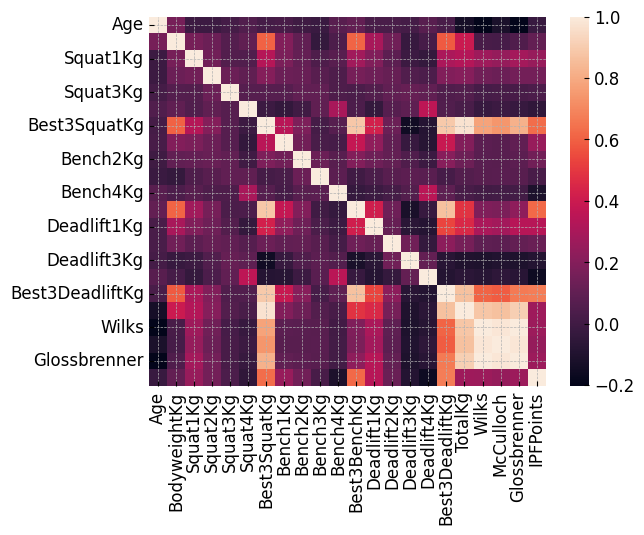

In [9]:
sns.heatmap(final_df_corr)

## Cleaning Columns

I know for my project I will not need the meet or any real information other than their best lifts (the weight that was actually lifted and not the fails), their total weights from all their lifts, their body weight, possibly their weight class and the event has to include all three lifts in order to get the most precise lift totals. Wilks is a value that determines the 'best lifter' baised on calculations to compare everyone even in different weight groups and sex's. 

In [10]:
final_df = final_df[['Name','Sex','Event','BodyweightKg','WeightClassKg','Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'Wilks']]
final_df = final_df[final_df['Event'] == 'SBD']
final_df

,Name,Sex,Event,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks
0,Abbie Murphy,F,SBD,59.8,60,105.0,55.0,130.0,290.0,324.16
1,Abbie Tuong,F,SBD,58.5,60,120.0,67.5,145.0,332.5,378.07
3,Amy Moldenhauer,F,SBD,60.0,60,105.0,72.5,132.5,310.0,345.61
4,Andrea Rowan,F,SBD,104.0,110,140.0,80.0,170.0,390.0,321.25
5,April Alvarez,F,SBD,74.0,75,142.5,82.5,145.0,370.0,354.74
...,...,...,...,...,...,...,...,...,...,...
1423349,Marian Cafalik,M,SBD,73.5,74,175.0,87.5,190.0,452.5,327.07
1423350,Marian Piwowarczyk,M,SBD,63.5,66,110.0,95.0,170.0,375.0,304.16
1423351,Andrzej Bryniarski,M,SBD,94.4,105,160.0,100.0,180.0,440.0,274.48
1423352,Stanisław Goroczko,M,SBD,80.8,83,NaN,NaN,NaN,NaN,NaN


In [11]:
display(final_df.shape)
display(final_df.info())
display(final_df.describe())

(1073237, 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073237 entries, 0 to 1423353
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1073237 non-null  object 
 1   Sex              1073237 non-null  object 
 2   Event            1073237 non-null  object 
 3   BodyweightKg     1060848 non-null  float64
 4   WeightClassKg    1063532 non-null  object 
 5   Best3SquatKg     1023866 non-null  float64
 6   Best3BenchKg     1005075 non-null  float64
 7   Best3DeadliftKg  997978 non-null   float64
 8   TotalKg          984329 non-null   float64
 9   Wilks            979510 non-null   float64
dtypes: float64(6), object(4)
memory usage: 90.1+ MB


None

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks
count,1.060848e+06,1.023866e+06,1.005075e+06,997978.000000,984329.000000,979510.000000
mean,8.293900e+01,1.740409e+02,1.090983e+02,186.277487,470.242944,344.519759
std,2.299413e+01,6.924442e+01,4.984036e+01,61.576463,171.629892,82.140234
min,1.769000e+01,-4.625000e+02,-3.650000e+02,-347.500000,38.600000,28.230000
25%,6.577000e+01,1.224700e+02,7.000000e+01,138.350000,333.090000,286.550000
50%,8.083000e+01,1.678300e+02,1.050000e+02,183.700000,460.000000,338.720000
75%,9.789000e+01,2.175000e+02,1.400000e+02,230.000000,585.000000,395.810000
max,2.580000e+02,5.750000e+02,4.558600e+02,585.000000,1367.500000,779.380000


## Duplicates

In [12]:
final_df.duplicated().sum()

35719

In [13]:
final_df[final_df.duplicated]

,Name,Sex,Event,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks
405,Emily Knauth,F,SBD,80.8,82.5,145.5,82.5,135.0,362.5,329.88
406,John Sheridan,M,SBD,136.5,140,410.0,210.0,260.0,880.0,493.66
407,Josh Vale,M,SBD,81.2,82.5,220.0,112.5,210.0,542.5,366.95
408,Ron Birch,M,SBD,98.7,100,192.5,120.0,187.5,500.0,305.92
409,Shane Atta-Singh,M,SBD,165.0,140+,335.0,272.5,292.5,900.0,491.11
...,...,...,...,...,...,...,...,...,...,...
1423340,Sławomir Śledź,M,SBD,58.7,59,183.0,142.5,190.0,515.5,448.64
1423341,Rafał Lipka,M,SBD,122.6,120+,260.0,170.0,270.0,700.0,400.52
1423342,Rafał Paprocki,M,SBD,72.8,74,170.0,115.0,250.0,535.0,389.37
1423346,Józef Gromek,M,SBD,93.1,105,240.0,155.0,270.0,665.0,417.53


I figured to drop the duplicates thinking they just competed multiple times so they had multiple entries. Even if that is the case, the duplicates are not needed for the findings. So they can all be dropped. 

In [14]:
final_df.drop_duplicates( inplace= True)

In [15]:
display(final_df.duplicated().sum())
display(final_df.shape)

0

(1037518, 10)

## Missing Values

In [16]:
final_df.isna().sum()

Name                   0
Sex                    0
Event                  0
BodyweightKg       11408
WeightClassKg       8945
Best3SquatKg       47417
Best3BenchKg       65897
Best3DeadliftKg    72876
TotalKg            85963
Wilks              90539
dtype: int64

Since I am dealing with weightlifting data, I can not just insert a median or average into missing values (for example median bench press is 275lbs and a 140lb lifter has no values. That 140lb lifter now has 275lb bench which is very un-likely). Because of this, I will drop all of the missing values. 

In [17]:
final_df.dropna(inplace=True)
display(final_df.isna().sum())
display(final_df.shape)

Name               0
Sex                0
Event              0
BodyweightKg       0
WeightClassKg      0
Best3SquatKg       0
Best3BenchKg       0
Best3DeadliftKg    0
TotalKg            0
Wilks              0
dtype: int64

(944280, 10)

## Outliers

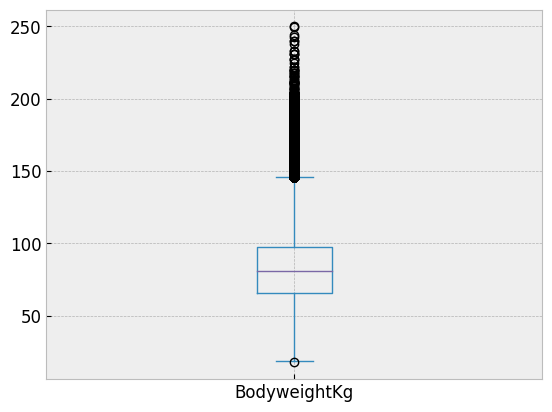

In [18]:
final_df['BodyweightKg'].plot(kind='box')
plt.show()

In [19]:
q1 = final_df['BodyweightKg'].quantile(.25)
q3 = final_df['BodyweightKg'].quantile(.75)
range = q3-q1

print('Q1: {}, Q3: {}, Range: {} '.format(q1,q3,range))

lower_bound = q1 - 1.5 * range
upper_bound = q3 + 1.5 * range

print('Lower bound: {}, Upper bound: {}'.format(lower_bound,upper_bound))

Q1: 65.7, Q3: 97.66, Range: 31.959999999999994 
Lower bound: 17.760000000000012, Upper bound: 145.6


In [20]:
final_df[(final_df['BodyweightKg'] < lower_bound) | (final_df['BodyweightKg'] > upper_bound)]

,Name,Sex,Event,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks
29,Meagan Rochfort,F,SBD,146.4,110+,137.5,72.5,142.5,352.5,272.07
85,Joe Ordon,M,SBD,162.0,140+,290.0,195.0,280.0,765.0,418.61
129,Carolyn Ferrando,F,SBD,149.2,90+,170.0,80.5,160.0,410.0,315.67
163,Kristie Owen,F,SBD,148.6,90+,170.0,77.5,165.0,412.5,317.74
228,Andy Hargreaves,M,SBD,148.3,140+,320.0,180.0,285.0,785.0,435.03
...,...,...,...,...,...,...,...,...,...,...
1421544,Aaron Healy,M,SBD,153.0,120+,170.0,80.0,165.0,415.0,228.98
1422306,Israel Samaniego,M,SBD,152.0,120+,190.0,150.0,230.0,570.0,314.79
1422867,Jorge Free,M,SBD,155.2,120+,270.0,190.0,325.0,785.0,432.25
1423084,Oscar Villalobos Pelayo,M,SBD,195.3,120+,290.0,180.0,240.0,710.0,377.96


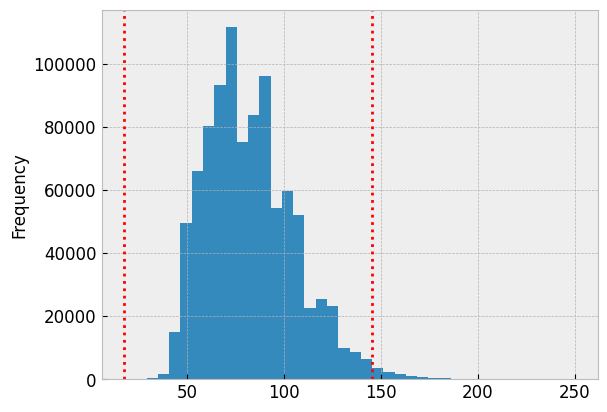

In [21]:
final_df['BodyweightKg'].plot.hist(bins=40)
bounds = [lower_bound, upper_bound]
for bound in bounds:
    plt.axvline(bound, color='r', linestyle=':')
plt.show()

After looking at the outliers, I believe I will keep these values. As people can truly be 150kg, especially powerlifters. So I will keep this larger values in. 

## Next Steps

As for the next steps, for ML, I believe I will use the standard_df to help determine if theese lifters are considered above average, intermidiate, elite, etc. from their lifting numbers compared to others in their weight class. 

# Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [22]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 7714 bytes to source.py
